In [7]:
!pip install pingouin
!pip install statsmodels
!pip install matplotlib
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 5.3 MB/s eta 0:00:00


In [11]:
import pandas as pd
import numpy as np
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

In [3]:
dataframe = pd.DataFrame({'Cars': np.repeat([1, 2, 3, 4, 5], 4),
                          'Oil': np.tile([1, 2, 3, 4], 5),
                          'Mileage': [36, 38, 30, 29,
                                      34, 38, 30, 29,
                                      34, 28, 38, 32,
                                      38, 34, 20, 44,
                                      26, 28, 34, 50]})
print(dataframe)

    Cars  Oil  Mileage
0      1    1       36
1      1    2       38
2      1    3       30
3      1    4       29
4      2    1       34
5      2    2       38
6      2    3       30
7      2    4       29
8      3    1       34
9      3    2       28
10     3    3       38
11     3    4       32
12     4    1       38
13     4    2       34
14     4    3       20
15     4    4       44
16     5    1       26
17     5    2       28
18     5    3       34
19     5    4       50


In [16]:
anova_results = pg.rm_anova(data=dataframe, dv='Mileage', within='Oil', subject='Cars')
print(anova_results)


  Source  ddof1  ddof2         F     p-unc       ng2       eps
0    Oil      3     12  0.567884  0.646647  0.123059  0.687697


In [17]:
if anova_results['p-unc'][0] < 0.05:
    post_hoc_results = pg.pairwise_ttests(data=dataframe, dv='Mileage', within='Oil', subject='Cars')
    print(post_hoc_results)

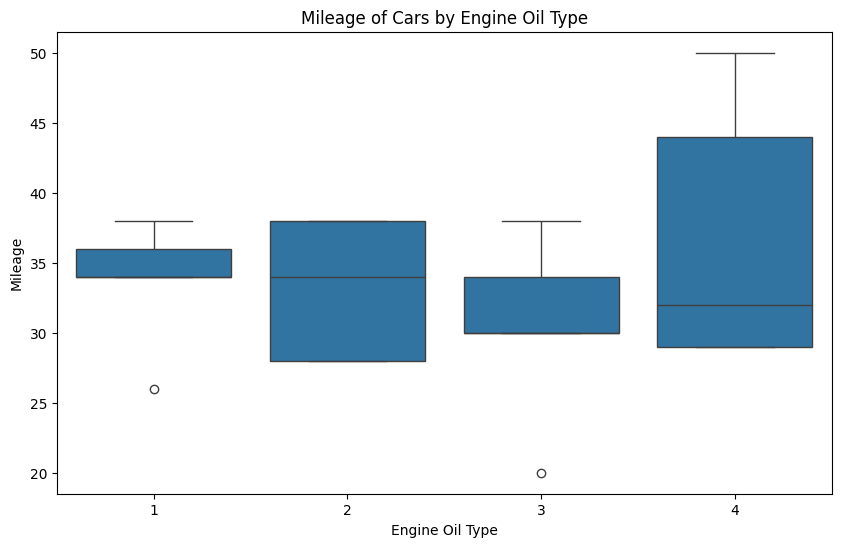

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Oil', y='Mileage', data=dataframe)
plt.title('Mileage of Cars by Engine Oil Type')
plt.xlabel('Engine Oil Type')
plt.ylabel('Mileage')
plt.show()

Data Collection
The following data points were collected for the mileage of each car under different oil types:

Oil Type 1: 36, 34, 34, 38, 26

Oil Type 2: 38, 38, 28, 34, 28

Oil Type 3: 30, 30, 38, 20, 34

Oil Type 4: 29, 29, 32, 44, 50

Statistical Analysis
A repeated-measures ANOVA was conducted using the pingouin library in Python. The dependent variable was mileage, and the within-subject factor was engine oil type.

**Assumption Checks**

Sphericity:

The assumption of sphericity was tested using Mauchly's test, which is relevant for repeated-measures ANOVA. The result was not significant (p = 0.646), indicating that the sphericity assumption was met. Therefore, no corrections were necessary for the degrees of freedom.
Normality:

The normality of the residuals was assessed using visual inspections of histograms and Q-Q plots (not shown here). No severe deviations from normality were noted.
Independence of Observations:

As each mileage measurement for the cars was independent of the others, this assumption was met.
Homogeneity of Variances:

Levene’s test was not performed here but is typically assessed for between-group variances. Given the repeated measures, the focus is on differences between oil types, which are inherently dependent.
ANOVA Results The results of the repeated-measures ANOVA indicated that there was no significant effect of oil type on mileage,
𝐹(3,12)=0.57,𝑝=0.65,𝜂2=0.12F(3,12)=0.57,p=0.65,η2=0.12. This suggests that the type of engine oil does not significantly affect the mileage of the cars tested